## Sobre o desafio

Com base no módulo que acabamos de ver (Análise Exploratória de Dados), no curso Desenvolvimento de IA da Rockeseat, junte suas anotações e conhecimento adquirido para analisar a seguinte base de dados:

Dessa base, analise e extraia:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

### Importando bibliotecas

In [1]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt

c:\Users\Will\.virtualenvs\ia-challenge-eda-william-cecchetti-n9gKh1GN\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Criando Dataframe com base no Dataset da Netflix

In [2]:
# Criando Dataframe
df_netflix = pd.read_csv('netflix_daily_top_10.csv')
df_netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


### Tipos de dados disponíveis

In [3]:
# Tipos de dados disponíveis
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### Período da análise feita

In [4]:
# Período inicial da análise
periodo_inicial = pd.to_datetime(df_netflix['As of']).dt.date.min()
print(periodo_inicial)

2020-04-01


In [6]:
# Período final da análise
periodo_final = pd.to_datetime(df_netflix['As of']).dt.date.max()
print(periodo_final)

2022-03-11


### Tamanho da base dados

In [9]:
# Tamanho da base de dados
df_netflix.shape
# ou
# df_netflix.info()

(7100, 10)

### Verificar dados nulos

In [10]:
# Verificar dados nulos
df_netflix.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [13]:
# Tipos de dados na coluna Netflix Exclusive
df_netflix['Netflix Exclusive'].value_counts()

Netflix Exclusive
Yes    4599
Name: count, dtype: int64

### Gráficos dados do Dataframe

Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

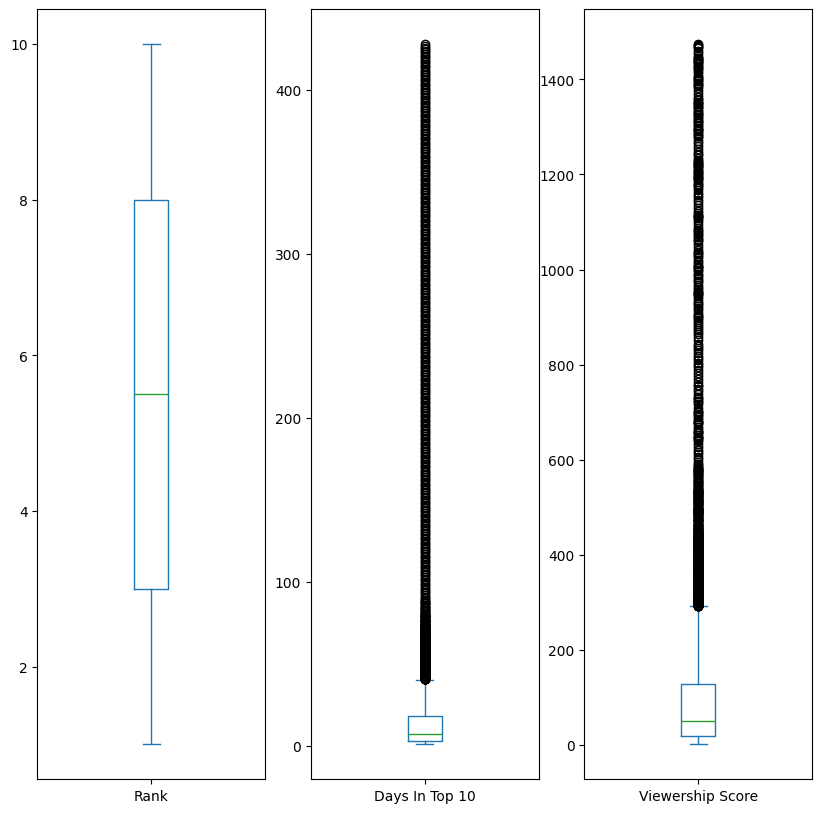

In [19]:
# Box Plot
df_netflix.plot.box(figsize=(10, 10), subplots=True)

### Outliers

array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Days In Top 10'}>],
       [<Axes: title={'center': 'Viewership Score'}>, <Axes: >]],
      dtype=object)

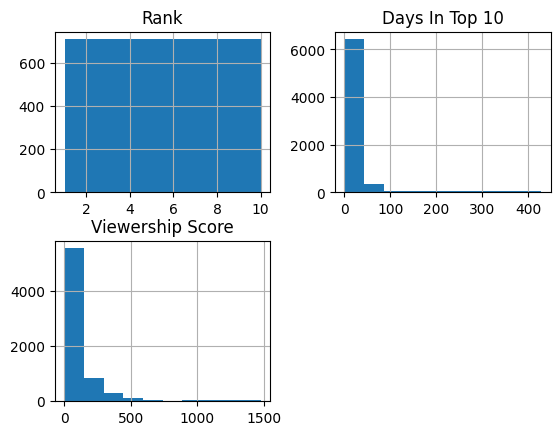

In [ ]:
# Histograma para validar a normalidade dos dados e encontrar um outlier
df_netflix.hist()

In [ ]:
# Verificar outliers em 'Days In Top 10' 
df_netflix[df_netflix['Days In Top 10'] >= 365]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
5768,2021-10-29,9,8,6,Cocomelon,TV Show,NaN,"Jun 1, 2020",365,1293
5779,2021-10-30,10,9,5,Cocomelon,TV Show,NaN,"Jun 1, 2020",366,1294
5788,2021-10-31,9,10,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",367,1296
5798,2021-11-01,9,9,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",368,1298
5806,2021-11-02,7,9,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",369,1302
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


<Axes: ylabel='Title'>

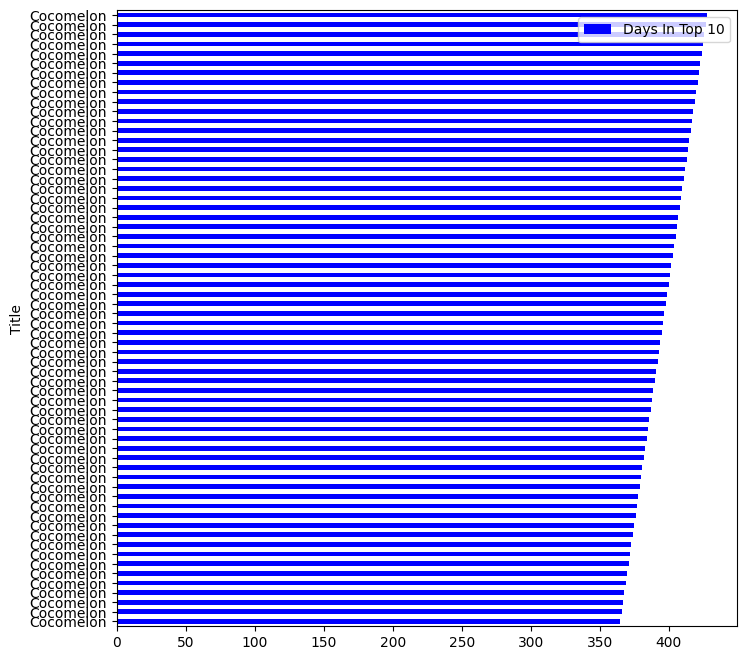

In [ ]:
# Plot BARH exibindo a quantidade em que um filme ou série ficou no Top 10 por mais de 365 dias
df_netflix[df_netflix['Days In Top 10'] >= 365].plot(x='Title', y='Days In Top 10', kind='barh', figsize=(8, 8), color='blue')

In [52]:
# Verificar outliers em 'Viewership Score' 
df_netflix[df_netflix['Viewership Score'] >= 1000]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
4916,2021-08-05,7,6,6,Cocomelon,TV Show,NaN,"Jun 1, 2020",281,1000
4927,2021-08-06,8,7,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",282,1003
4938,2021-08-07,9,8,6,Cocomelon,TV Show,NaN,"Jun 1, 2020",283,1005
4949,2021-08-08,10,9,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",284,1006
4959,2021-08-09,10,10,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",285,1007
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


<Axes: ylabel='Title'>

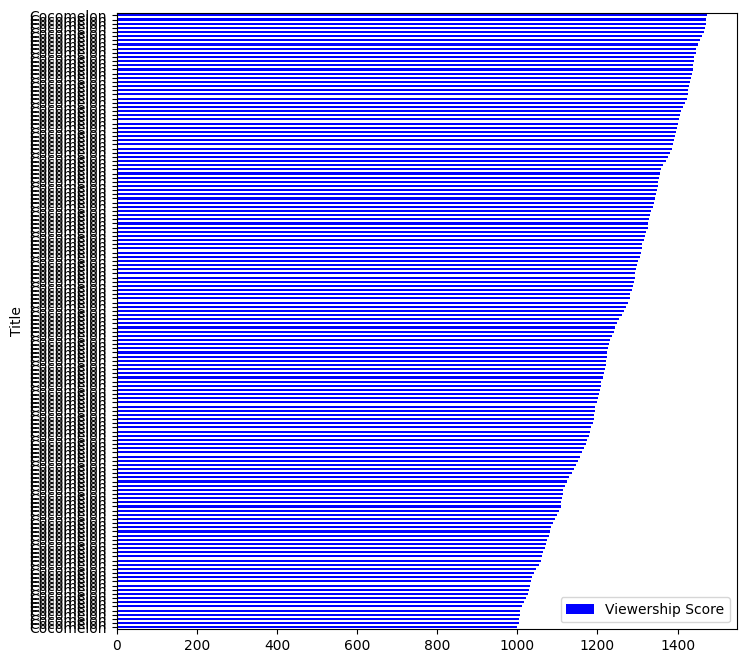

In [53]:
# Plot BARH exibindo o Viewership Score de um filme ou séie que teve mais de 1000 pontos
df_netflix[df_netflix['Viewership Score'] >= 1000].plot(x='Title', y='Viewership Score', kind='barh', figsize=(8, 8), color='blue')

- O maior Outlier é o programa de TV infantil Cocomelon

## Relatório EDA Automatizado

In [54]:
# Relatório geral
sv_netflix_report = sv.analyze(df_netflix, target_feat='Days In Top 10')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [ ]:
# Visualizar report do sweetviz
sv_netflix_report.show_notebook()